## Ejemplo 7.2:  Generador pseudo aleatorio del cuadrado-medio

$\newcommand{\ket}[1]{|{#1}\rangle}\newcommand{\bra}[1]{\langle{#1}|}$Un generador de números pseudo-aleatorios parte de un número *semilla* para generar una salida. El número generado pasaría a ser la semilla de la siguiente interacción. Aunque el generador pseudo-aleatorio funciona de forma determinista internamente, si desconocemos la semilla, el experimento se puede modelar como aleatorio (con su correspondiente espacio muestral y eventos con cierta probabilidad asociada).


Una de las primeras propuestas de esta herramienta fue el *generador cuadrado-medio*, propuesto por John von Neumann en 1946. Este generador toma el cuadrado de un número semilla $x_i$ y devuelve las cifras centrales del resultado:
\begin{align*}
   x_i^2 = 
   549\underbrace{0684654}_{x{i+1}}841
\end{align*}


In [6]:
def generador_cuadrado_medio(semilla = None):
    len_x = 9  # Trabajamos con 9 digitos

    if semilla is not None:
        global xo 
        xo = semilla
    else:
        str_xo2 = str(xo ** 2).zfill(2 * len_x)
        xo = int(str_xo2[len_x//2 : len_x//2 + len_x -1])
    return xo

Así, si la semilla fuese conocida sería sencillo predecir la salida del generador de forma determinista. Si la semilla es desconocida, en cambio, el resultado es aparentemente aleatorio. En este caso, se puede emplear la teoría de la probabilidad para modelar la *ignorancia* sobre el estado interno del sistema.

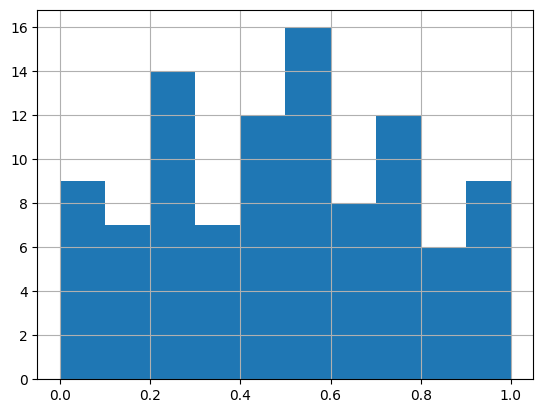

In [17]:
import time
import numpy as np
import matplotlib.pyplot as plt

# Set the seed as the current system time
generador_cuadrado_medio(int(time.time()))

# Generate 100 random numbers
N = 100
x = np.zeros(N)
for i in range(N):
    x[i] = generador_cuadrado_medio()

# Display the histogram between 0 and 1
plt.hist(x / np.max(x), bins=np.arange(0, 1.01, .1))
plt.grid(True)
plt.show()
